# LSTM (Long Short-Term Memory)
**LSTM** is a specialized type of **Recurrent Neural Network (RNN)**. It was designed to overcome the **vanishing/exploding gradient problem** in traditional RNNs, enabling the effective learning of long-term dependencies in sequential data. LSTMs are widely used in **NLP**, **speech recognition**, **time-series forecasting**, and more.

## Core Idea: Gating Mechanism & Memory Cell
LSTM's key innovation lies in its **three gating mechanisms** and a **memory cell**, which regulate information flow:
1. **Forget Gate**
**Purpose**: Decides what information to discard from the memory cell.
2. **Input Gate**
**Purpose**: Controls what new information to store in the memory cell.
3. **Memory Cell Update**
**Purpose**: Combines old and new information.
4. **Output Gate**
**Purpose**: Generates the hidden state $h_t$ based on the updated memory.

Epoch [10/100], Loss: 0.0473
Epoch [20/100], Loss: 0.0334
Epoch [30/100], Loss: 0.0166
Epoch [40/100], Loss: 0.0201
Epoch [50/100], Loss: 0.0285
Epoch [60/100], Loss: 0.0211
Epoch [70/100], Loss: 0.0180
Epoch [80/100], Loss: 0.0152
Epoch [90/100], Loss: 0.0654
Epoch [100/100], Loss: 0.0145


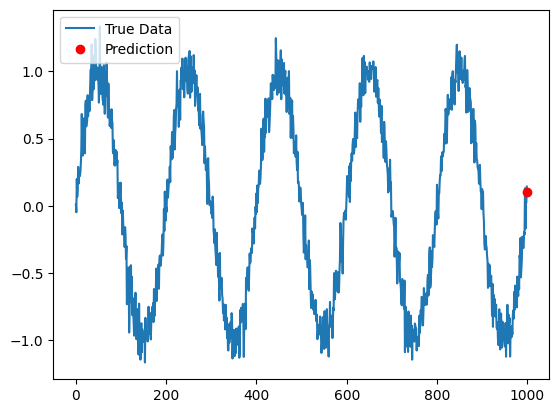

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# hyperparameter
SEQ_LENGTH = 20 
HIDDEN_SIZE = 32  # Size of hidden
EPOCHS = 100
LEARNING_RATE = 0.01

# Create data
t = np.linspace(0, 10 * np.pi, 1000)
data = np.sin(t) + 0.1 * np.random.randn(1000)

# Convert data to tensor
data = torch.FloatTensor(data).view(-1, 1)


# Create dataset
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append((seq, label))
    return sequences


dataset = create_sequences(data, SEQ_LENGTH)


# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=HIDDEN_SIZE,
            batch_first=True
        )
        self.fc = nn.Linear(HIDDEN_SIZE, 1)

    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)  # out: (batch, seq_len, hidden_size)
        out = self.fc(out[:, -1, :])  
        return out


model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train loop
for epoch in range(EPOCHS):
    total_loss = 0
    for seq, labels in dataset:
        optimizer.zero_grad()
        pred = model(seq.unsqueeze(0))  # add batch dimension
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{EPOCHS}], Loss: {total_loss / len(dataset):.4f}')

# Predict and visualization
model.eval()
with torch.no_grad():
    test_seq = data[-SEQ_LENGTH:].unsqueeze(0)
    prediction = model(test_seq)

plt.plot(data.numpy(), label='True Data')
plt.plot(len(data) - 1, prediction.item(), 'ro', label='Prediction')
plt.legend()
plt.show()